Preview of dataset_part_2.csv:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B00

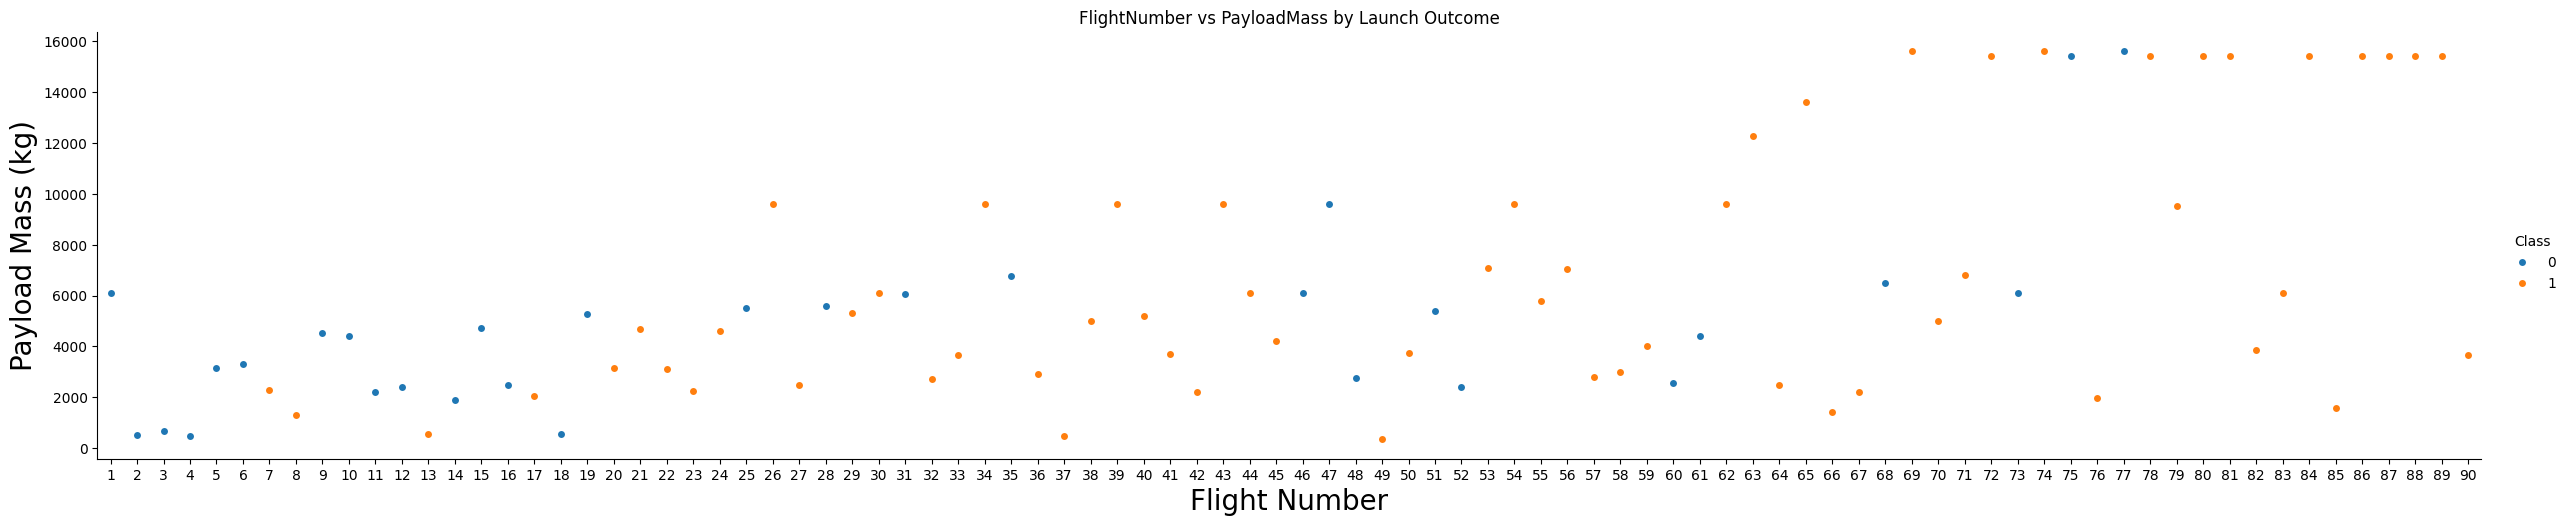


Preview of Year column added:
         Date  Year
0  2010-06-04  2010
1  2012-05-22  2012
2  2013-03-01  2013
3  2013-09-29  2013
4  2013-12-03  2013

Selected features:
   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  

Preview of features after One-Hot Encoding:
   FlightNumber

In [1]:
# -----------------------------------------------
# EXO 5 – EDA & Feature Engineering
# -----------------------------------------------

# Installer les bibliothèques nécessaires
!pip install --quiet numpy pandas matplotlib seaborn

# Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset (dataset_part_2.csv depuis Exo 3)
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Afficher les 5 premières lignes
print("Preview of dataset_part_2.csv:")
print(df.head())

# --------------------------------------------------
# EDA: FlightNumber vs PayloadMass by Class
# --------------------------------------------------
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("FlightNumber vs PayloadMass by Launch Outcome")
plt.show()

# --------------------------------------------------
# Extract Year from Date
# --------------------------------------------------
df['Year'] = df['Date'].str.split('-').str[0]
print("\nPreview of Year column added:")
print(df[['Date', 'Year']].head())

# --------------------------------------------------
# Feature Selection
# --------------------------------------------------
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print("\nSelected features:")
print(features.head())

# --------------------------------------------------
# One-Hot Encoding for Categorical Features
# --------------------------------------------------
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_columns)
print("\nPreview of features after One-Hot Encoding:")
print(features_one_hot.head())

# --------------------------------------------------
# Cast all numeric columns to float64
# --------------------------------------------------
features_one_hot = features_one_hot.astype(float)
print("\nData types after casting:")
print(features_one_hot.dtypes)

# --------------------------------------------------
# Export the engineered dataset
# --------------------------------------------------
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("\nDataset exported to 'dataset_part_3.csv'")
